# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting continous values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this lab, you'll review precision, recall, accuracy, and F1 score in order to evaluate our logistic regression models.


## Objectives 

In this lab you will: 

- Implement evaluation metrics from scratch using Python 



## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


At times, it may be best to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## Split the data into training and test sets

In [20]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Split the data first into `X` and `y`, and then into training and test sets. Assign 25% to the test set and set the `random_state` to 0. 

In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split data into X and y
y = df.target
X = df.drop('target',axis='columns')

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [22]:
X.shape,X_test.shape,X_train.shape

((303, 13), (76, 13), (227, 13))

## Build a vanilla logistic regression model

- Import and instantiate `LogisticRegression` 
- Make sure you do not use an intercept term and use the `'liblinear'` solver 
- Fit the model to training data

In [23]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False,C=1e11,solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train,y_train)
model_log

LogisticRegression(C=100000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_hat_test=model_log.predict(X_test)

In [25]:
y_hat_test,y_test

(array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64), 225    0
 152    1
 228    0
 201    0
 52     1
       ..
 46     1
 160    1
 232    0
 181    0
 27     1
 Name: target, Length: 76, dtype: int64)

## Write a function to calculate the precision

In [26]:
def precision(y_test, y_hat_test):
    # precision =   TP/(TP+FP)
    # find TP and FP
    # for TP count y_hat = y =1 
    # for FP count y_hat=1 & y= 0
    df=pd.DataFrame(y_test)
    df=df.assign(pred=y_hat_test)
    df=df.loc[df['pred']==1]
    df['sum']=df.target+df.pred
    count=df['sum'].value_counts()
    precision = count[2]/(count[1]+count[2])
    return precision

In [27]:
precision(y_test, y_hat_test)

0.8125

## Write a function to calculate the recall

In [28]:
def recall(y_test, y_hat_test):
    # recall =   TP/(TP+FN)
    # find TP and FN
    # for TP count y_hat = y =1 
    # for FN count y_hat=0 & y= 1
    listo = list(zip(y_test,y_hat_test))
    # listo is a list of tuples
    TP = sum([1 for i in listo if i[0]==1 and i[1]==1])
    FN = sum([1 for i in listo if i[0]==1 and i[1]==0])
    recall = TP/(TP+FN)
    return recall

In [29]:
recall(y_test, y_hat_test)

0.9069767441860465

## Write a function to calculate the accuracy

In [30]:
def accuracy(y, y_hat):
    # accuracy =( TP + TN )/total number of observations
    # find TP and TN
    # for TP count y_hat = y =1 
    # for TN count y_hat= y= 0
    listo = list(zip(y,y_hat))
    # listo is a list of tuples
    TP = sum([1 for i in listo if i[0]==1 and i[1]==1])
    TN = sum([1 for i in listo if i[0]==0 and i[1]==0])
    accuracy = (TP + TN)/len(y)
    return accuracy

In [31]:
accuracy(y_test,y_hat_test)

0.8289473684210527

## Write a function to calculate the F1 score

In [32]:
def f1_score(y, y_hat):
#     F1score = 2*(Precision*Recall)/(Precision+Recall)
    precision_v = precision(y, y_hat)
    recall_v = recall(y, y_hat)
    F1score = 2*(precision_v*recall_v)/(precision_v+recall_v)
    return F1score

In [34]:
f1_score(y_test,y_hat_test)

0.8571428571428572

## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [35]:
# Your code here
y_hat_train = model_log.predict(X_train)
y_hat_test = model_log.predict(X_test)

Great job! Now it's time to check your work with `sklearn`. 

## Calculate metrics with `sklearn`

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions above with the `sklearn` functions. Calculate these values for both your train and test set. 

In [36]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('precision train ',precision_score(y_train,y_hat_train))
print('recall train ',recall_score(y_train,y_hat_train))
print('accuracy train ',accuracy_score(y_train,y_hat_train))
print('f1_score train ',f1_score(y_train,y_hat_train))
print('precision test ',precision_score(y_test,y_hat_test))
print('recall test ',recall_score(y_test,y_hat_test))
print('accuracy test ',accuracy_score(y_test,y_hat_test))
print('f1_score test ',f1_score(y_test,y_hat_test))

precision train  0.8396946564885496
recall train  0.9016393442622951
accuracy train  0.8546255506607929
f1_score train  0.8695652173913043
precision test  0.8125
recall test  0.9069767441860465
accuracy test  0.8289473684210527
f1_score test  0.8571428571428572


Nicely done! Did the results from `sklearn` match that of your own? 

## Compare precision, recall, accuracy, and F1 score for train vs test sets

Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i/100) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train,y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train) 
    
    # Your code here
    # compute currnet values of recall precision accuracy and f1score
    ptrain=precision_score(y_train,y_hat_train)
    rtrain=recall_score(y_train,y_hat_train)
    atrain=accuracy_score(y_train,y_hat_train)
    f1train=f1_score(y_train,y_hat_train)
    ptest=precision_score(y_test,y_hat_test)
    rtest=recall_score(y_test,y_hat_test)
    atest=accuracy_score(y_test,y_hat_test)
    f1test=f1_score(y_test,y_hat_test)
    # update  lists with the curent values
    training_precision.append(ptrain)
    testing_precision.append(ptest)
    training_recall.append(rtrain)
    testing_recall.append(rtest)
    training_accuracy.append(atrain)
    testing_accuracy.append(atest)
    training_f1.append(f1train)
    testing_f1.append(f1test)
    


In [45]:
print(testing_accuracy)

[0.7741935483870968, 0.7352941176470589, 0.8378378378378378, 0.825, 0.7906976744186046, 0.8260869565217391, 0.8163265306122449, 0.9038461538461539, 0.8727272727272727, 0.7931034482758621, 0.8524590163934426, 0.875, 0.8208955223880597, 0.8142857142857143, 0.7945205479452054, 0.8289473684210527, 0.8227848101265823, 0.8170731707317073, 0.8823529411764706, 0.75, 0.8681318681318682, 0.8829787234042553, 0.8041237113402062, 0.89, 0.875, 0.8130841121495327, 0.8, 0.8672566371681416, 0.8103448275862069, 0.8151260504201681, 0.8114754098360656, 0.864, 0.828125, 0.8091603053435115, 0.8731343283582089, 0.8175182481751825, 0.8642857142857143, 0.8041958041958042, 0.815068493150685, 0.8322147651006712, 0.8092105263157895, 0.7612903225806451, 0.8164556962025317, 0.8385093167701864, 0.8414634146341463, 0.8143712574850299, 0.7764705882352941, 0.838150289017341, 0.7613636363636364, 0.8044692737430168, 0.7747252747252747, 0.8324324324324325, 0.8191489361702128, 0.8272251308900523, 0.8041237113402062, 0.7918

Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one. 

We already created the scatter plot for precision: 

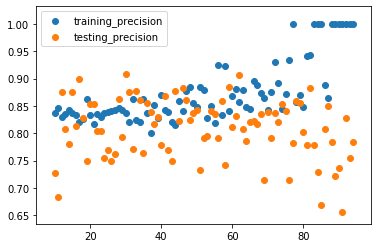

In [46]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

In [ ]:
#as the size of the test set increases, the train precision increases and the test precision decreases
#precision is the ratio between TP and all positive predictions
#why would train precision increase when train size decreases? 


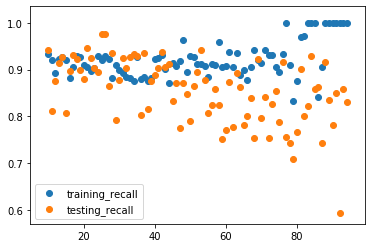

In [47]:
# Train and test recall

plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

In [ ]:
# testing recall goes down when the size of the testing set goes up.
# recall is the ratio between TP and all the actual positives
# there are more actual positives when the size of test set goes up


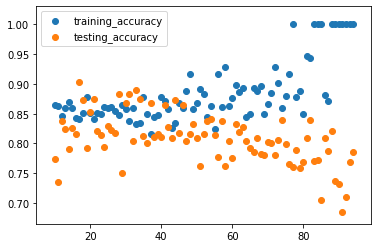

In [48]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

In [ ]:
# accuracy is the ratio between TP+TN and the toal # of observations. It measures how often the prediction is right.
# test accuracy goes down when test size goes up
# harder to get them all right?

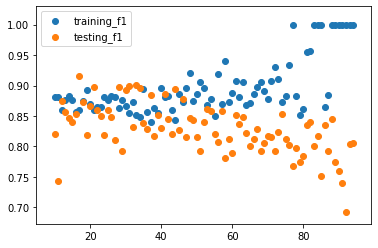

In [49]:
# Train and test F1 score

plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

## Summary

Nice! In this lab, you calculated evaluation metrics for classification algorithms from scratch in Python. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.